In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
def read_rewards(filepath):
    x = []
    with open(filepath, "rb") as openfile:
        while True:
            try:
                x.append(pickle.load(openfile))
            except EOFError:
                break
    return x

In [8]:
def _plot_for_appendix(ax, exp_name, runs=10, _type='mix',
                       _legends=[], legend=False,
                       yticks=[-30, 0, 30, 60, 90, 120],
                       xticks=None,
                       stop_th=200, loc=(.70, 1.1), _mod=1):
    eval_reward_p = 'evaluation_rewards'
    epis_reward_p = 'episodic_rewards'
    # all_times_p = 'all_times'

    r_episodic_s = []
    r_eval_s = []
    # times = []

    for seed in range(0, runs):
        epis_filepath = f'{exp_name}/{epis_reward_p}/seed_{seed}.pkl'
        eval_filepath = f'{exp_name}/{eval_reward_p}/seed_{seed}.pkl'
        # all_times_filepath = f'{exp_name}' + f'/{all_times_p}/seed_{seed}.pkl'

        if 'facmac' in epis_filepath:
            r_episodic = read_rewards(epis_filepath)[::_mod]
            r_eval = read_rewards(eval_filepath)[::_mod]
        else:
            r_episodic = read_rewards(epis_filepath)[0][::_mod]
            r_eval = read_rewards(eval_filepath)[0][::_mod]
        r_episodic = [i for item in r_episodic for i in item]
        r_episodic_s.append(r_episodic)

        r_eval_s.append(r_eval)

        # all_times = read_rewards(all_times_filepath)[0]
        # times.append(all_times)

    _r = np.concatenate((np.mean(r_eval_s, axis=0), np.mean(np.sum(r_eval_s, axis=2), axis=0)[None].T), axis=1)

    _r_stds = np.concatenate((np.std(r_eval_s, axis=0), np.std(np.sum(r_eval_s, axis=2), axis=0)[None].T), axis=1)

    xs = [i * stop_th * _mod for i in range(_r.shape[0])]

    if legend:
        lines = ax.plot(xs, _r, label=_legends)

        lines[-1].set_color('green')
        leg = axes[0][0].legend(shadow=False, fancybox=True, loc=loc, ncol=6)
        for line in leg.get_lines():
            line.set_linewidth(10.0)

    else:
        lines = ax.plot(xs, _r)
        lines[-1].set_color('green')

    for i in range(_r.shape[1]):
        ax.fill_between(xs,
                        (_r - (_r_stds * 1.96) / np.sqrt(nb_version))[:, i],
                        (_r + (_r_stds * 1.96) / np.sqrt(nb_version))[:, i],
                        color=lines[i].get_color(), alpha=0.2)

    # ax.text(len(_r) - 1, _r[-1][-1], np.round(_r[-1][-1], 2))
    print(_type, _r[-1])
    ax.set_ylabel('Average Reward')
    ax.set_xlabel('Episode #')
    # ax.legend(_legends, loc='lower right')
    ax.title.set_text(f'{_type}')
    if yticks:
        ax.set_yticks(yticks)
    if xticks:
        ax.set_xticks(xticks)

CQF [24.45247697 22.00928244 15.50502793 61.96678735]
IQF [30.77368679 30.32061362 32.22480621 93.31910661]
CDDPG [26.68233196 25.27449104 29.95079303 81.90761603]
IDDPG [30.50207249 34.63799333 34.57430584 99.71437165]
MADDPG-IND [26.33411024 29.44301728 29.74106453 85.51819205]
MADDPG-TEAM [25.10179205 27.29509707 26.75739442 79.15428354]
FACMAC [ 35.16366757  35.50207294  34.8839672  105.54970772]
MQF [32.96884503 30.94633353 33.40561157 97.32079013]


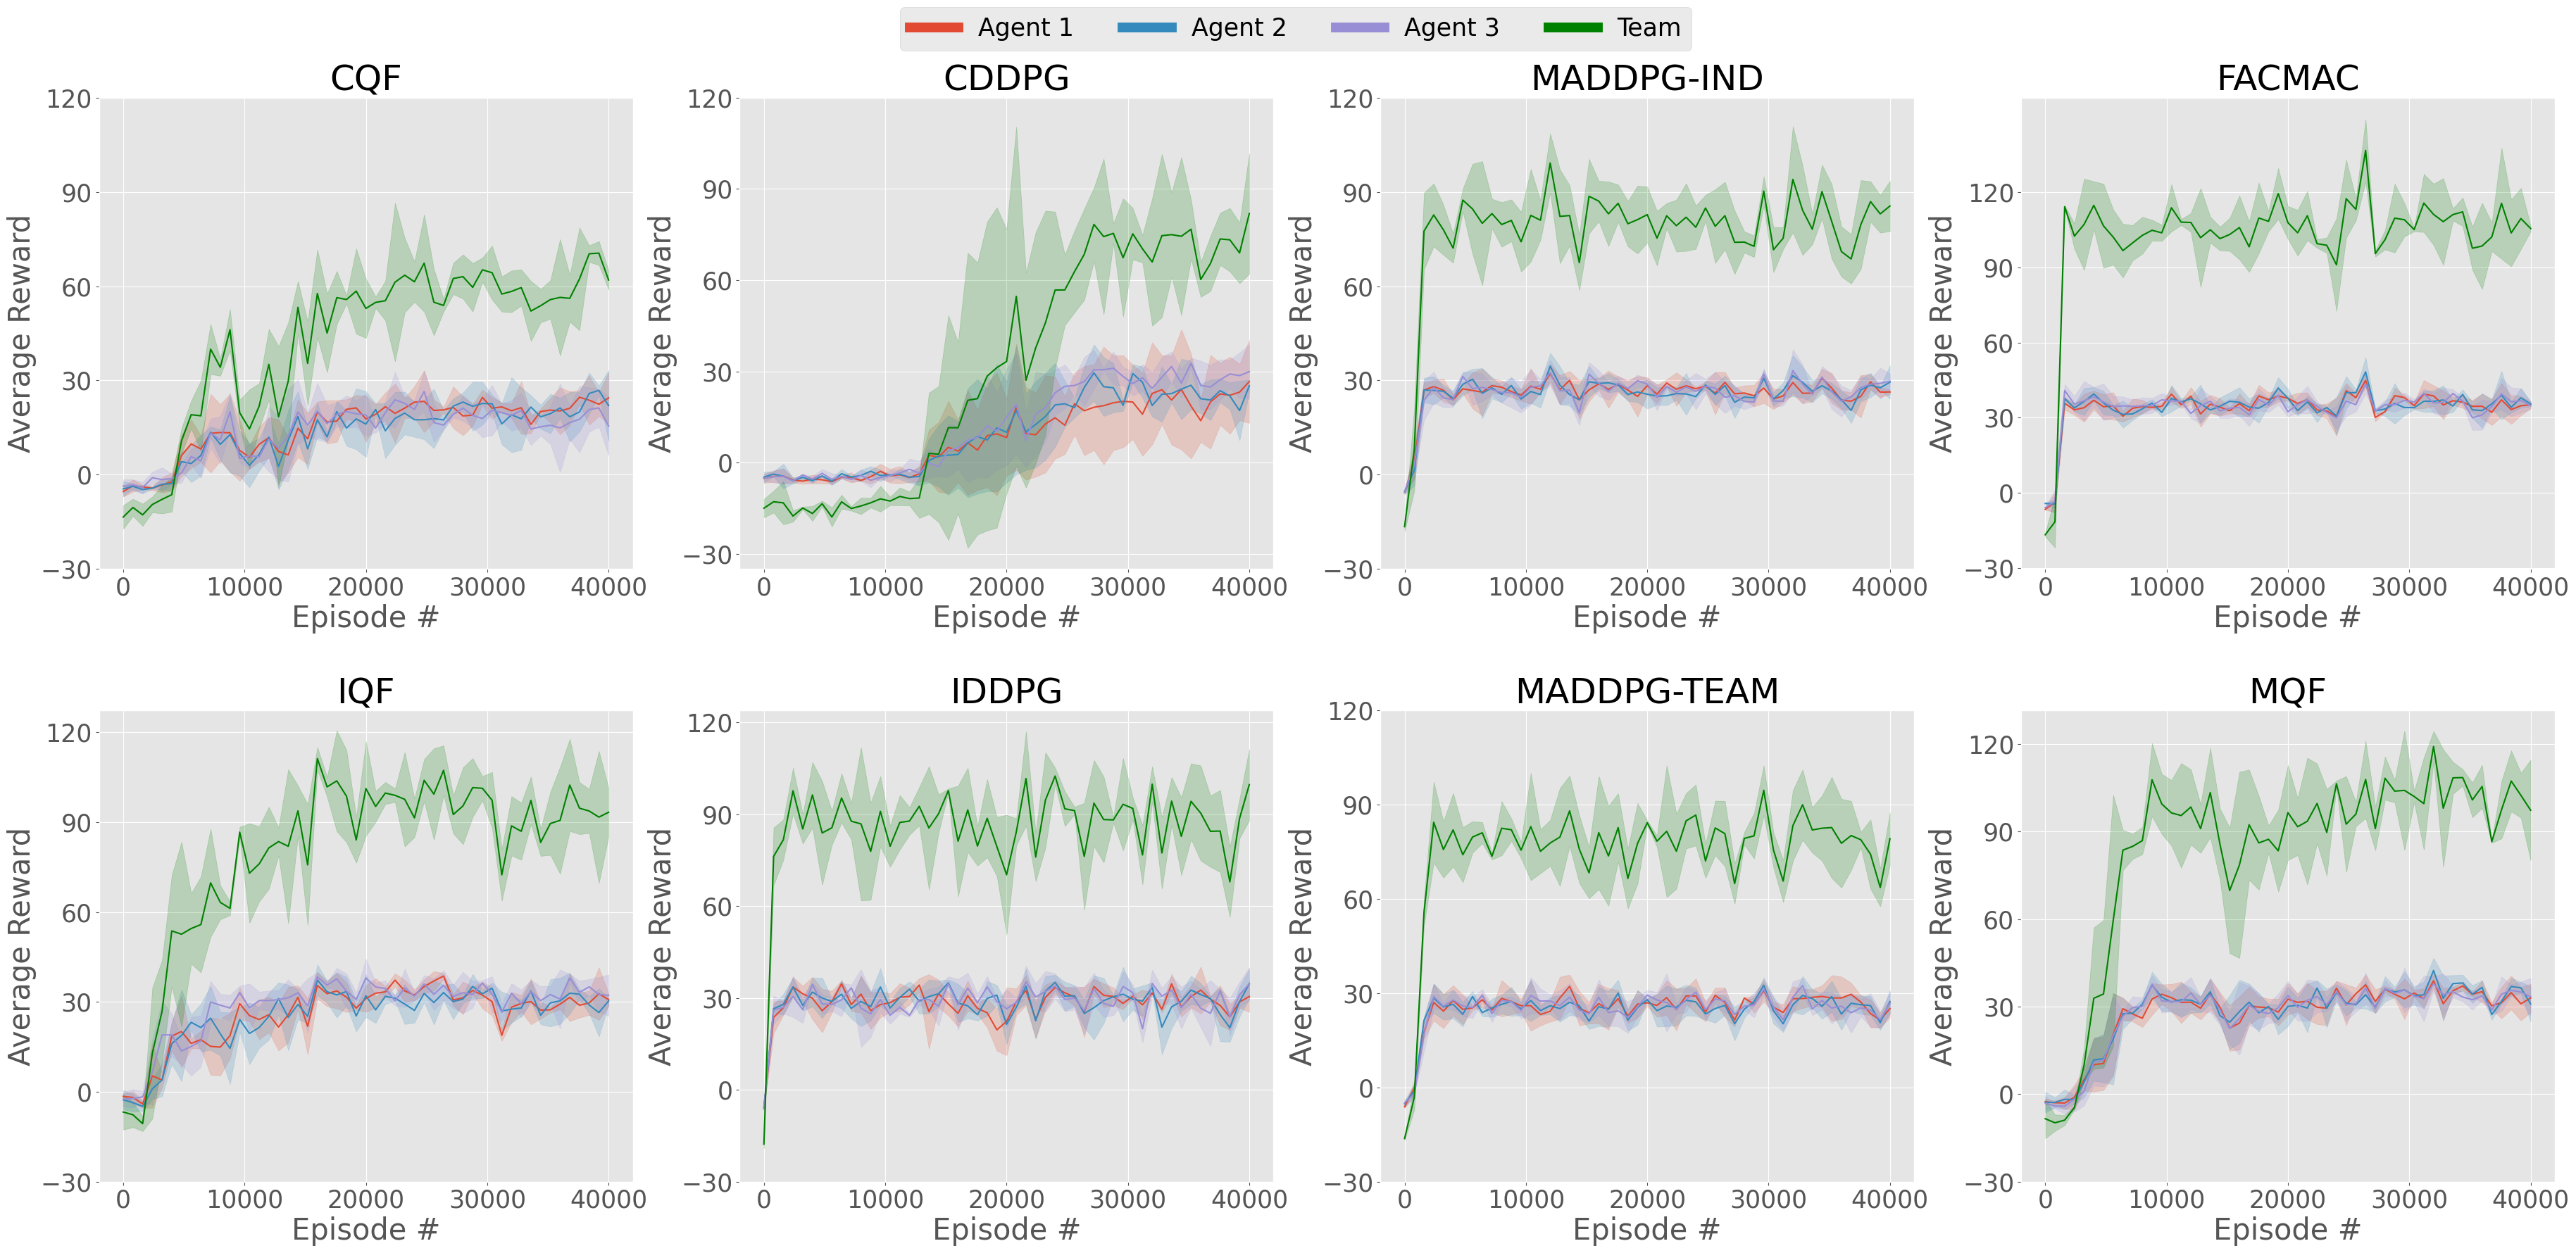

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(45, 20))
plt.subplots_adjust(hspace=0.3)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 25})
mix_keyword = 'mix_sum_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
ind_keyword = 'ind_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
cent_keyword = 'centralized_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
maddpg_keyword_50 = 'maddpg_run_50-step-update_r_type_episode-40000_lr0001_b512_l3_n256_m500000'
cddpg_keyword_50 = 'cddpg_run_50-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
iddpg_keyword_10 = 'iddpg_run_10-step-update_func-polynomial_rank-2_episode-40000_lr0001_b512_l3_n256_m500000'
facmac = 'facmac_run_1-nb-update_episode-40000_lr001_b32_l3_n256_m500000'
nb_version = 3
_mod = 4
_plot_for_appendix(axes[0][0], cent_keyword,
                   legend=True, loc=(1.5, 1.1), _mod=_mod,
                   runs=nb_version, _type='CQF',
                   _legends=['Agent 1', 'Agent 2', 'Agent 3', 'Team'])

_plot_for_appendix(axes[1][0], ind_keyword,
                   runs=nb_version, _type='IQF', _mod=_mod)

_plot_for_appendix(axes[0][1], cddpg_keyword_50,
                   runs=nb_version, _type='CDDPG', _mod=_mod)

_plot_for_appendix(axes[1][1], iddpg_keyword_10,
                   runs=nb_version, _type='IDDPG', _mod=_mod)

_plot_for_appendix(axes[0][2], maddpg_keyword_50.replace('r_type', 'individual-reward'), _mod=_mod,
                   runs=nb_version, _type='MADDPG-IND', )

_plot_for_appendix(axes[1][2], maddpg_keyword_50.replace('r_type', 'team-reward'), _mod=_mod,
                   runs=nb_version, _type='MADDPG-TEAM')

_plot_for_appendix(axes[0][3], facmac, runs=nb_version, _mod=20, stop_th=40, _type='FACMAC')

_plot_for_appendix(axes[1][3], mix_keyword, _mod=_mod,
                   runs=nb_version, _type='MQF', )



In [10]:
fig.savefig('ICPP_appendix_neurips.svg')